# Prédiction de l'évaluation d'une Voiture



## 1.Importations des bibliothéque

In [1]:
import numpy as np                 #manipulation des tablaux et matrices
import pandas as pd                #pour Importer les dataset
import matplotlib.pyplot as plt    # pour traçer des graphes 
import category_encoders as ce    
import seaborn as sns              # pour la visialisation des données 

## 2.importer notre dataset

In [2]:
data = pd.read_csv("car_evaluation.csv",header=None)
data.head()    

,0,1,2,3,4,5,6
0,vhigh,vhigh,NaN,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,NaN,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 3. Analyse descriptive et Préparation du dataset

In [3]:
data.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,NaN,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,NaN,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,NaN,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
#afficher la dimension de notre dataset
data.shape

(1728, 7)

In [5]:
# Modification des noms de colonne pour améliorer
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,NaN,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,NaN,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [7]:
# affichage des informations de dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1724 non-null   object
 3   persons   1725 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#afficher les différentes valeurs uniques pour chaque colonne
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))
show(data)

Feature: maint with ['vhigh' 'high' 'med' 'low'] Levels
Feature: doors with [nan '2' '3' '4' '5more'] Levels
Feature: persons with ['2' nan '4' 'more'] Levels
Feature: lug_boot with ['small' 'med' 'big'] Levels
Feature: safety with ['low' 'med' 'high'] Levels
Feature: class with ['unacc' 'acc' 'vgood' 'good'] Levels


In [9]:
#compter le nombre de valeurs manquantes
data.isnull().sum() 

buying      0
maint       0
doors       4
persons     3
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
import warnings # Pour supprimer l'affichage des avertissements
warnings.filterwarnings('ignore')

In [11]:
#afficher les types de données (data types) de chaque colonn
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [12]:
def drop_all_nan_values(data): # j'ai définie ici une fonction s'appelle drop_all_nan_values et qui a pour parametre un jeu 
                                  #de données
  #Vérifier combien de valeurs nan il y a pour chaque variable on utilisant la fonction "isnull().sum()" 
  print('=> Vérifier les valeurs nan : Avant \n', data.isnull().sum())
  # supprimer toutes les valeurs NaN et les remplacer par la moyenne pour les colonnes où il y'a des valeurs NaN.

  data['doors'].fillna(data['doors'].mean(), inplace=True) 
  data['persons'].fillna(data['persons'].mean(), inplace=True)
  # revérifier les valeurs NaN  
  print('=>Vérifier les valeurs nan : Après \n', data.isnull().sum())
    
#inplace utilisé en fonction de si nous voulons apporter des modifications à notre data

In [13]:
#  encoder les variables catégorielles du DataFrame data en variables numériques
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,5,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,4,2,1,1
4,1,1,1,1,2,2,1


In [14]:
data = pd.DataFrame(data)

# Mélanger les données (sélectionner un échantillon aléatoire)
df_shuffled = data.sample(frac=1, random_state=42)

# Afficher le DataFrame mélangé
print(df_shuffled)

      buying  maint  doors  persons  lug_boot  safety  class
599        2      2      3        1         2       3      1
1201       3      4      1        2         2       2      2
628        2      2      4        1         3       2      1
1498       4      2      4        2         2       2      2
1263       3      4      3        3         2       1      1
...      ...    ...    ...      ...       ...     ...    ...
1130       3      3      2        3         2       3      3
1294       3      4      4        3         3       2      4
860        2      4      4        3         2       3      2
1459       4      2      3        1         1       2      1
1126       3      3      2        3         1       2      2

[1728 rows x 7 columns]


In [15]:
data.shape

(1728, 7)

In [16]:
#faire des statistique sur les données 
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.507523,2.004630,2.000000,2.000000,1.417245
std,1.118358,1.118358,1.123498,0.820257,0.816733,0.816733,0.747188
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.000000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000


### Séléction des features

In [17]:
# ici on va stoker dans la variable x l'ensemble des variables explicatives sans le variable à expliqué.
#la fonction drop il va supprimer le vriable class suivant axis=1, c'est à dire les colonnes de gauche à droite

x= data.drop(['class'], axis = 1)
x

,buying,maint,doors,persons,lug_boot,safety
0,1,1,5,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,4,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [18]:
y = data['class']
y

0       1
1       1
2       1
3       1
4       1
       ..
1723    4
1724    3
1725    1
1726    4
1727    3
Name: class, Length: 1728, dtype: int32

In [19]:
x.shape

(1728, 6)

In [20]:
#pour savoir parmi ces 1728 voiture, le nombre de voiture qui'on en 1 er classe, en 2 eme classe, en 3eme classe et en 4 eme classe

data['class'].value_counts()

1    1210
2     384
4      69
3      65
Name: class, dtype: int64

<Axes: >

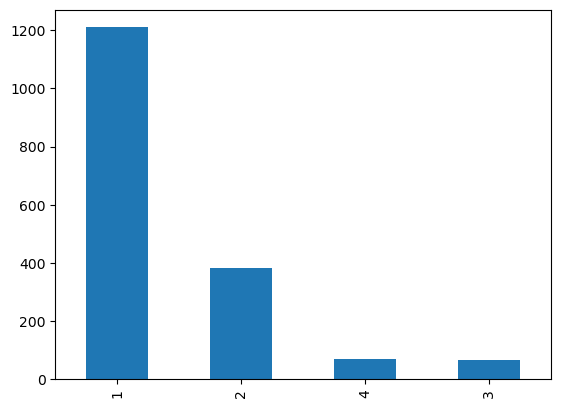

In [21]:
#les valeurs par classes en graphique matplotlib, car pandas est en coloboration avec matplotlib
data['class'].value_counts().plot.bar()

<Axes: xlabel='class', ylabel='persons'>

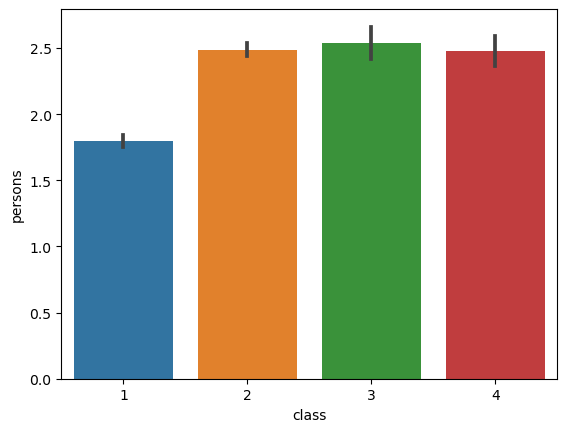

In [22]:
sns.barplot(x='class',y='persons',data=data)

<Axes: xlabel='class', ylabel='safety'>

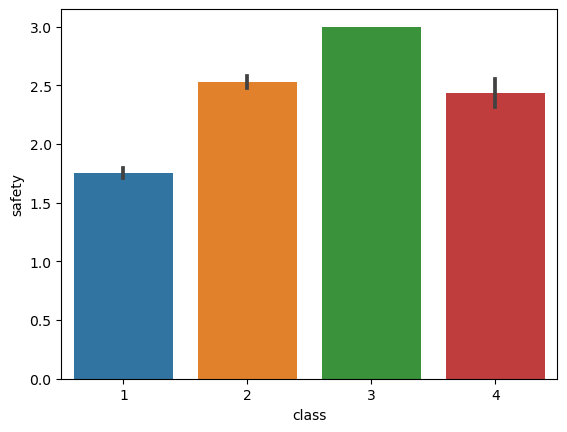

In [23]:
sns.barplot(x='class',y='safety',data=data)

# <font color="blue"> la répartition des features sur un histogramme:</font>
visualisation des données en désignant  des histogrammes 

-->la fonction dataframe.hist est utile pour comprendre la distribution des variables numériques.
-->La distribution des données est représentée par l’histogramme.
-->Lorsque Function Pandas DataFrame.hist() est utilisé, il appelle automatiquement la fonction matplotlib.pyplot.hist() 
    sur chaque série dans le DataFrame. En conséquence, nous avons obtenu un histogramme par colonne.

----------------Analyse des attributs----------------------


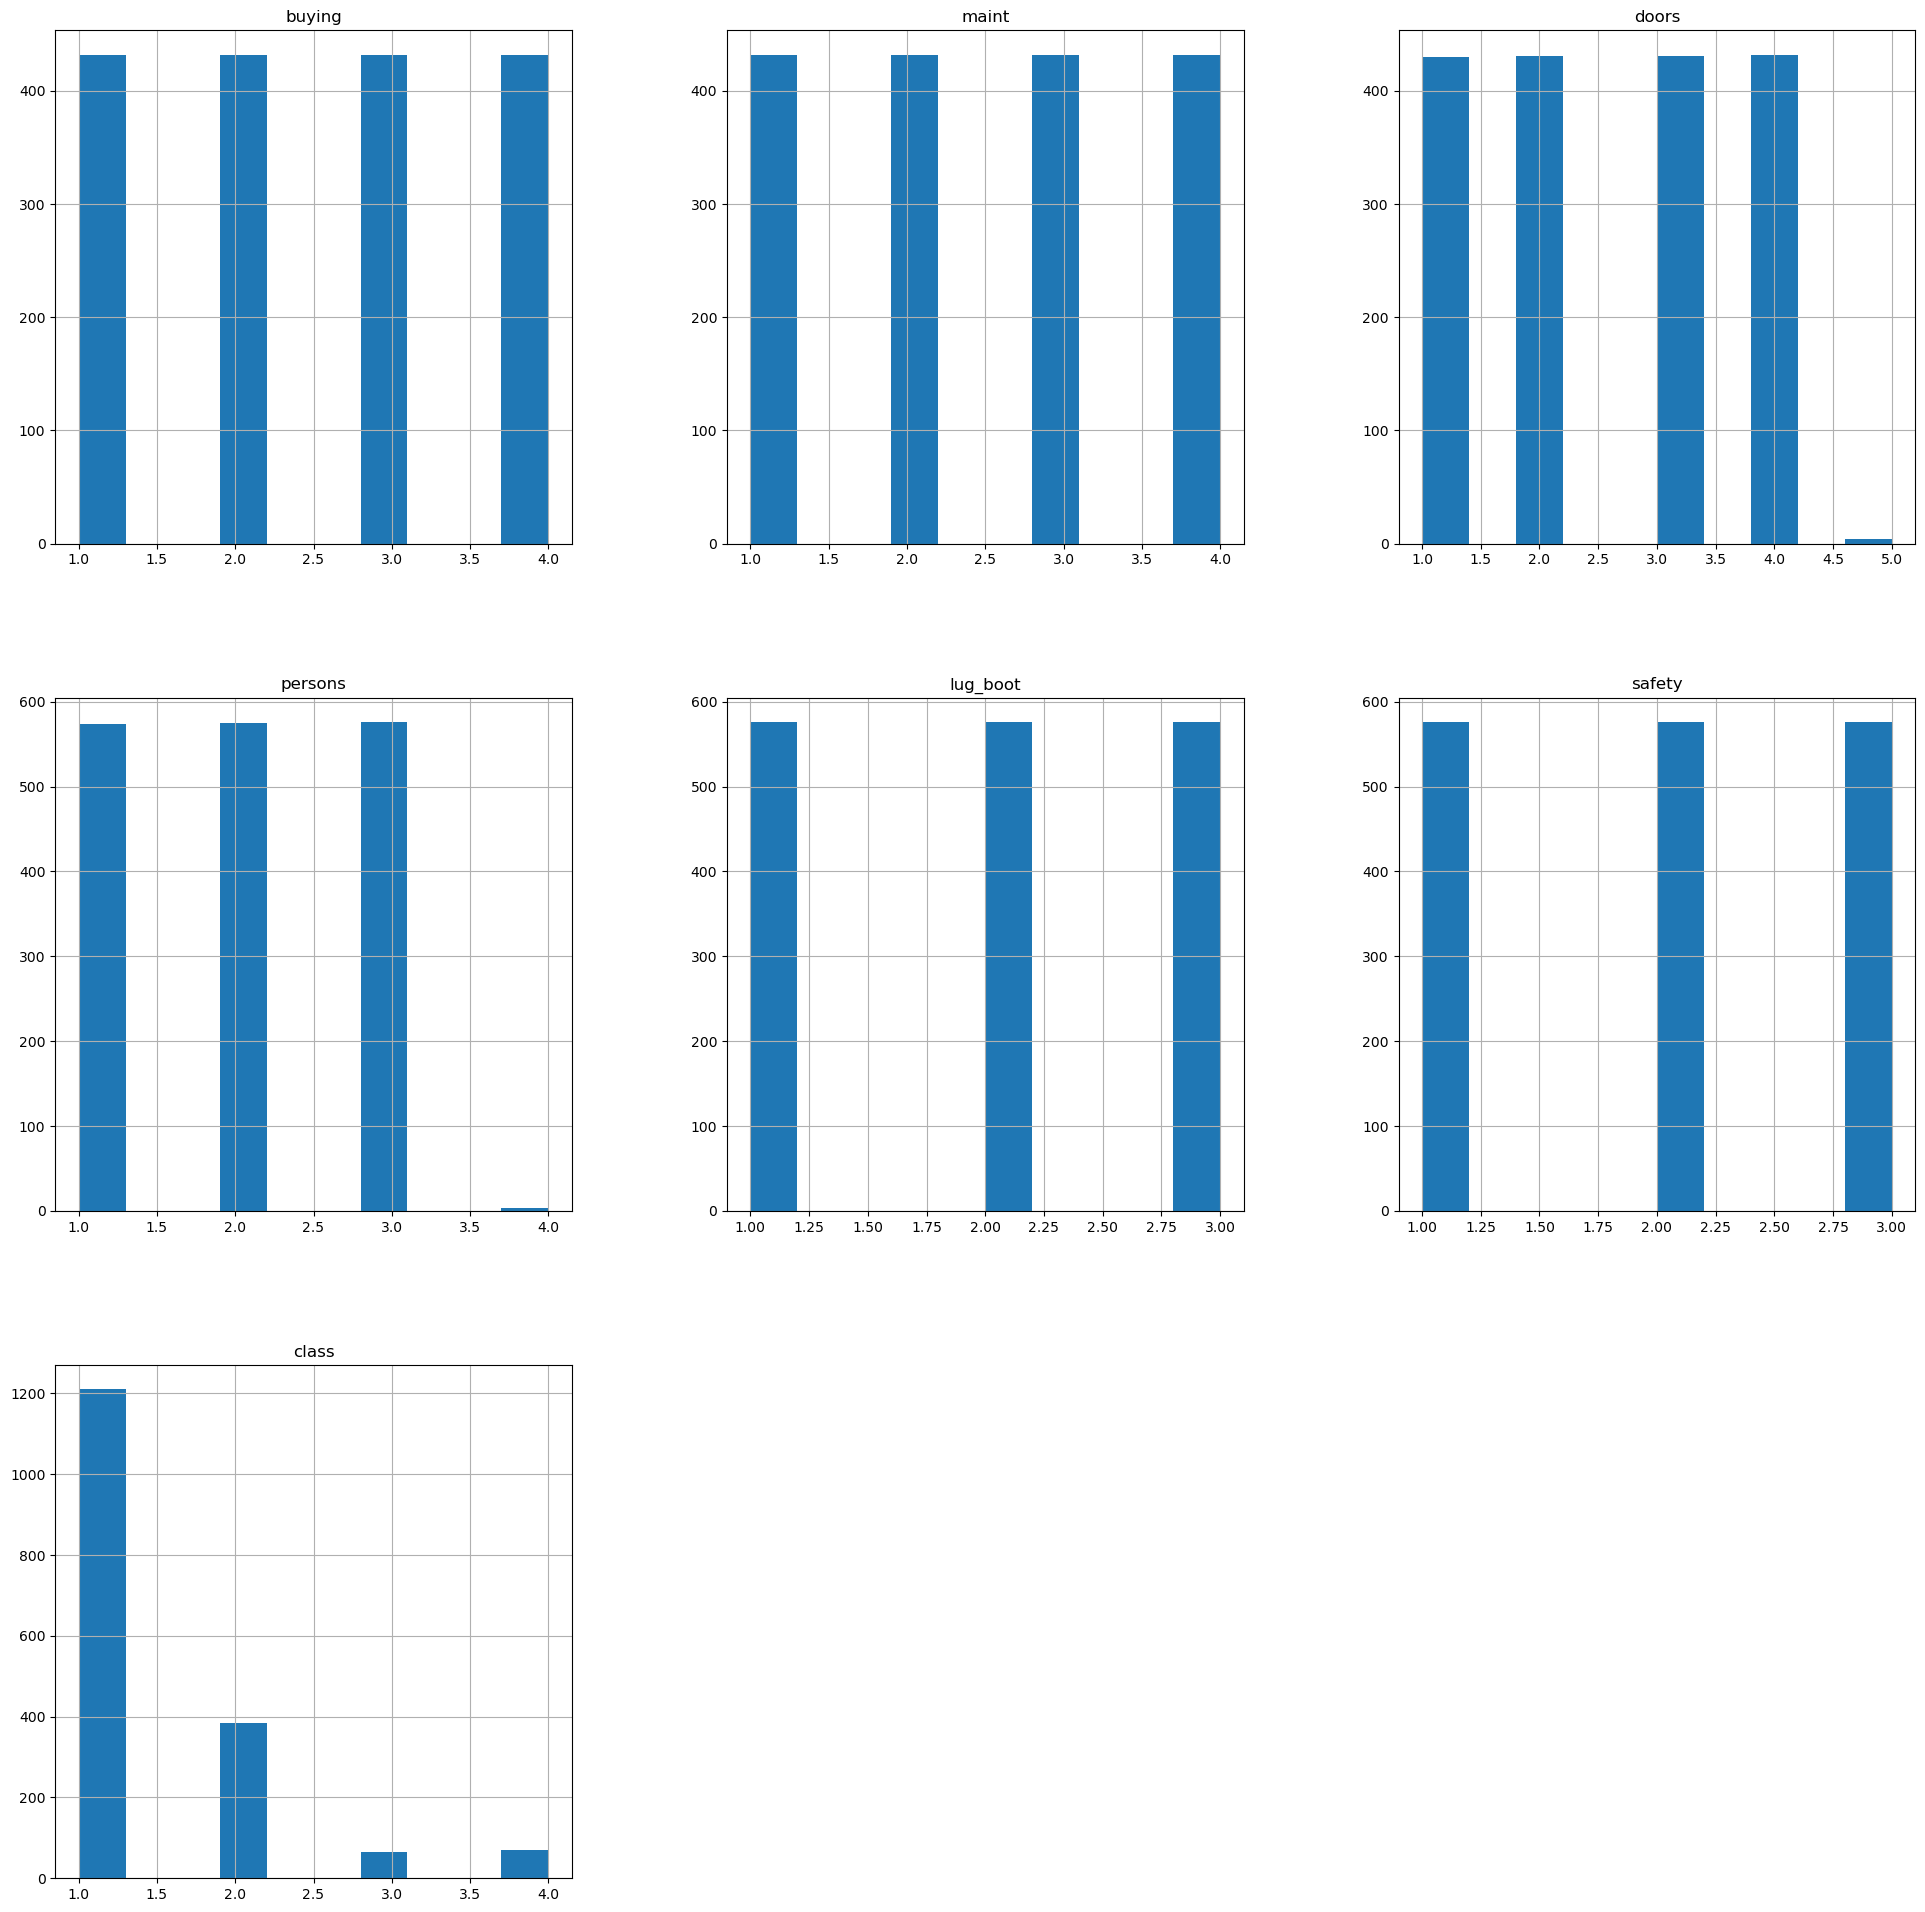

In [24]:
import matplotlib.pyplot as plt
print("----------------Analyse des attributs----------------------")
# Afficher l'histogramme des attributs
data.hist(sharex=False, sharey=False, figsize=(24, 24))
plt.show()

# <font color="blue"> Traçage de la boite à moustaches:</font>

Définition:La boîte à moustaches résume quelques indicateurs de position du caractère étudié (médiane, quartiles, minimum, maximum ou déciles) et montre la distribution des données.

<Axes: >

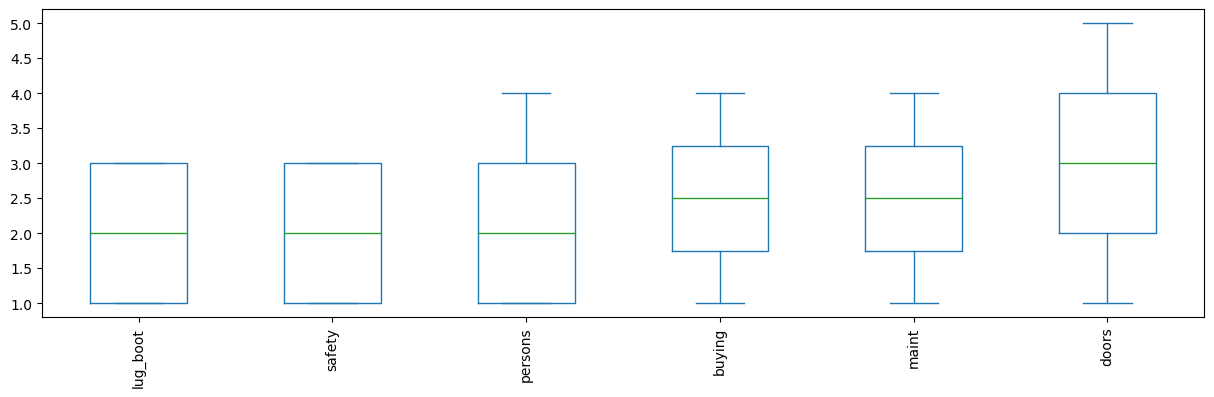

In [25]:
sort_by_mean=x.mean().sort_values(ascending=True)
x[sort_by_mean.index].plot(kind='box',figsize=(15,4),rot=90,ylabel='')

A partir de ce graphe on peut dire que:
-la variation des variables sont répartie dans le meme echelle.
-Il n'y a pas des valeurs aberrantes dans tous les colonnes  

# <font color="blue">La matrice de corrélation:</font>


La matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une 
table contenant les coefficients de corrélation entre chaque variable.

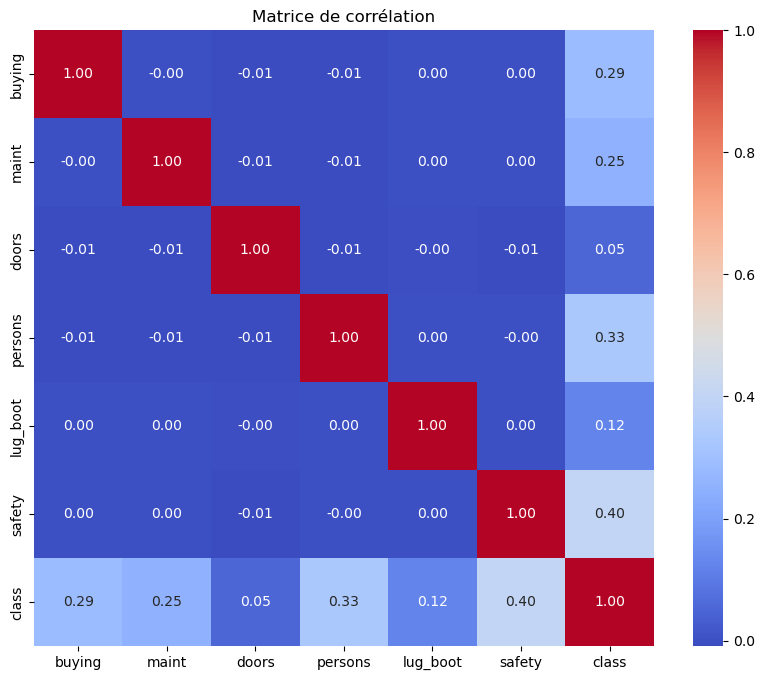

In [26]:
data = pd.DataFrame(data)

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

#  <font color="blue"> Visuliser la corrélation en nous ne considérons pas les corrélations entre variables explicatives X entre elles</font>


Text(0.5, 1.0, 'Correlation entre les attributes et la class')

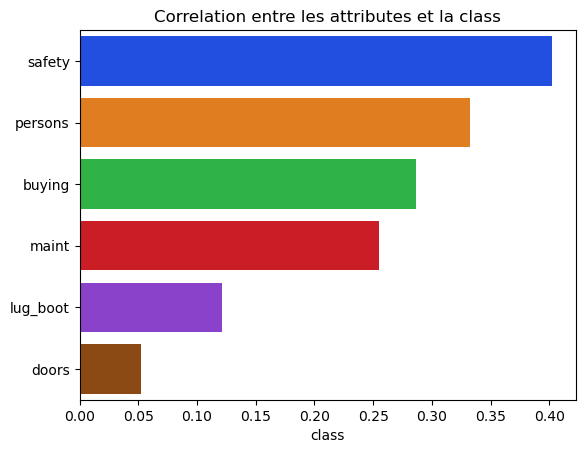

In [27]:
corr = data.corr()
correlation_with_class = corr['class']
cr = correlation_with_class.sort_values(ascending=False)[1:]
sns.barplot(x=cr, y=cr.index, palette="bright")
plt.title("Correlation entre les attributes et la class")


On remarque qu'il y a une forte corrélation entre la safety et la class, et la corrélation entre les cless et varaibles (persons,
buying,maint) est plus moins.

# 4.Application des l'algorithmes 


##### Creating Evaluation Parametric Function

In [28]:
data = pd.DataFrame(data)

# Mélanger les données (sélectionner un échantillon aléatoire)
df_shuffled = data.sample(frac=1, random_state=42)

# Afficher le DataFrame mélangé
print(df_shuffled)

      buying  maint  doors  persons  lug_boot  safety  class
599        2      2      3        1         2       3      1
1201       3      4      1        2         2       2      2
628        2      2      4        1         3       2      1
1498       4      2      4        2         2       2      2
1263       3      4      3        3         2       1      1
...      ...    ...    ...      ...       ...     ...    ...
1130       3      3      2        3         2       3      3
1294       3      4      4        3         3       2      4
860        2      4      4        3         2       3      2
1459       4      2      3        1         1       2      1
1126       3      3      2        3         1       2      2

[1728 rows x 7 columns]


In [29]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


Importer les modèles de classification (KNN, DT, LR,SVM)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

les métriques utlies pour évaluer Les performances des modèles de classification

In [32]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, f1_score,matthews_corrcoef
from sklearn.model_selection import learning_curve

# 1) KNN

In [33]:
knn=KNeighborsClassifier() # Keeping max_depth = 7 same as DT
knn.fit(x_train,y_train)

yp_train =knn.predict(x_train)
yp_test = knn.predict(x_test)

# Affichage du rapport de classification pour les données d'entraînement
result_train = classification_report(y_train, yp_train)
print("Classification Report for Train Data:")
print(result_train)

# Affichage du rapport de classification pour les données de test
result_test = classification_report(y_test, yp_test)
print("Classification Report for Test Data:")
print(result_test)


Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       852
           2       0.92      0.92      0.92       266
           3       1.00      0.76      0.86        41
           4       0.97      0.74      0.84        50

    accuracy                           0.96      1209
   macro avg       0.97      0.85      0.90      1209
weighted avg       0.96      0.96      0.96      1209

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       358
           2       0.84      0.81      0.83       118
           3       0.89      0.67      0.76        24
           4       0.77      0.53      0.62        19

    accuracy                           0.92       519
   macro avg       0.86      0.75      0.80       519
weighted avg       0.91      0.92      0.91       519



In [34]:
f1_KNN= f1_score(y_test, yp_test,average='micro')
MCC_KNN= matthews_corrcoef(y_test, yp_test)
print('F1:',f1_KNN)
print('MCC:',MCC_KNN)

F1: 0.9171483622350675
MCC: 0.8179791618540738


[ 96 193 290 386 483 580 676 773 870 967]


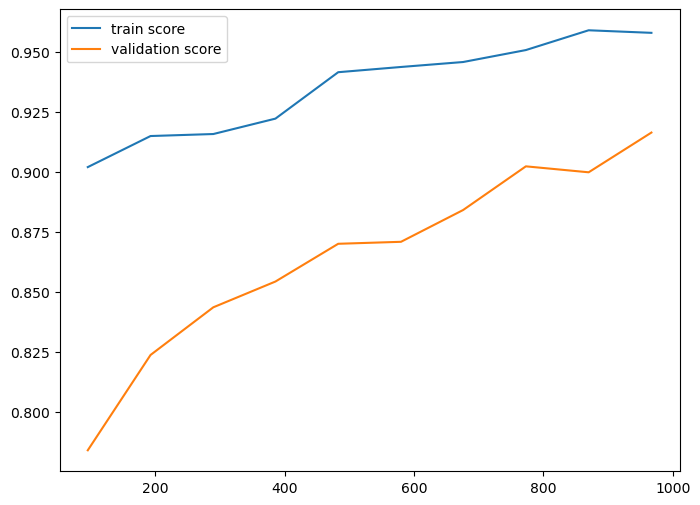

In [35]:
N, train_score, val_score = learning_curve(knn,x_train,y_train, train_sizes=np.linspace(0.1, 1, 10),cv=5)
print(N)
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

# 2) Decision Tree

In [36]:
# Création du modèle de régression logistique
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48)

# Entraînement du modèle sur les données d'entraînement
dt.fit(x_train,y_train)

# Prédiction sur les données d'entraînement et de test
yp_train = dt.predict(x_train)
yp_test = dt.predict(x_test)

# Affichage du rapport de classification pour les données d'entraînement
result_train = classification_report(y_train, yp_train)
print("Classification Report for Train Data:")
print(result_train)

# Affichage du rapport de classification pour les données de test
result_test = classification_report(y_test, yp_test)
print("Classification Report for Test Data:")
print(result_test)


Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       852
           2       0.86      0.94      0.90       266
           3       0.93      0.68      0.79        41
           4       0.81      0.76      0.78        50

    accuracy                           0.95      1209
   macro avg       0.90      0.84      0.86      1209
weighted avg       0.95      0.95      0.95      1209

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       358
           2       0.86      0.81      0.83       118
           3       0.77      0.83      0.80        24
           4       0.52      0.58      0.55        19

    accuracy                           0.92       519
   macro avg       0.78      0.80      0.79       519
weighted avg       0.92      0.92      0.92       519



In [37]:
f1_DT= f1_score(y_test, yp_test,average='micro')
MCC_DT= matthews_corrcoef(y_test, yp_test)
print('F1:',f1_DT)
print('MCC:',MCC_DT)

F1: 0.9171483622350675
MCC: 0.823102827214056


[ 96 193 290 386 483 580 676 773 870 967]


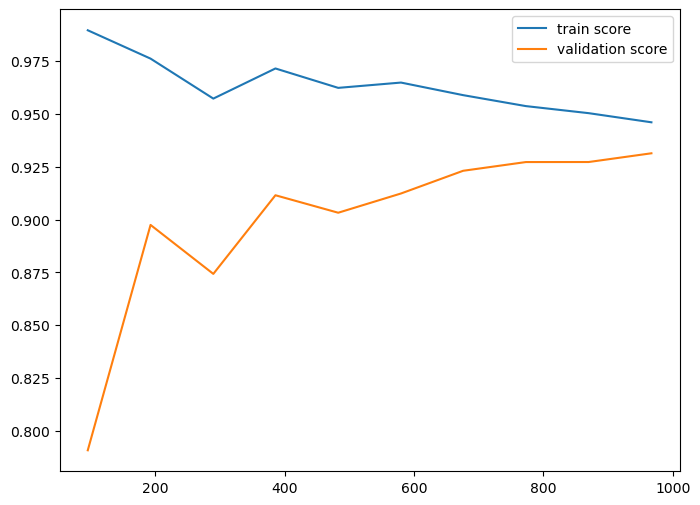

In [38]:
N, train_score, val_score = learning_curve(dt,x_train,y_train, train_sizes=np.linspace(0.1, 1, 10),cv=5)
print(N)
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

# 3) Logistics Regression

In [39]:
# Création du modèle de régression logistique
lr = LogisticRegression(max_iter=1000, random_state=48)

# Entraînement du modèle sur les données d'entraînement
lr.fit(x_train, y_train)

# Prédiction sur les données d'entraînement et de test
yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

# Affichage du rapport de classification pour les données d'entraînement
result_train = classification_report(y_train, yp_train)
print("Classification Report for Train Data:")
print(result_train)

# Affichage du rapport de classification pour les données de test
result_test = classification_report(y_test, yp_test)
print("Classification Report for Test Data:")
print(result_test)


Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.88      0.93      0.91       852
           2       0.67      0.58      0.62       266
           3       0.79      0.63      0.70        41
           4       0.53      0.38      0.44        50

    accuracy                           0.82      1209
   macro avg       0.71      0.63      0.67      1209
weighted avg       0.81      0.82      0.82      1209

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.66      0.57      0.61       118
           3       0.75      0.75      0.75        24
           4       0.55      0.32      0.40        19

    accuracy                           0.82       519
   macro avg       0.71      0.64      0.66       519
weighted avg       0.81      0.82      0.81       519



In [40]:
f1_LR= f1_score(y_test, yp_test,average='micro')
MCC_LR= matthews_corrcoef(y_test, yp_test)
print('F1:',f1_LR)
print('MCC:',MCC_LR)

F1: 0.8169556840077071
MCC: 0.5916116185036464


[ 96 193 290 386 483 580 676 773 870 967]


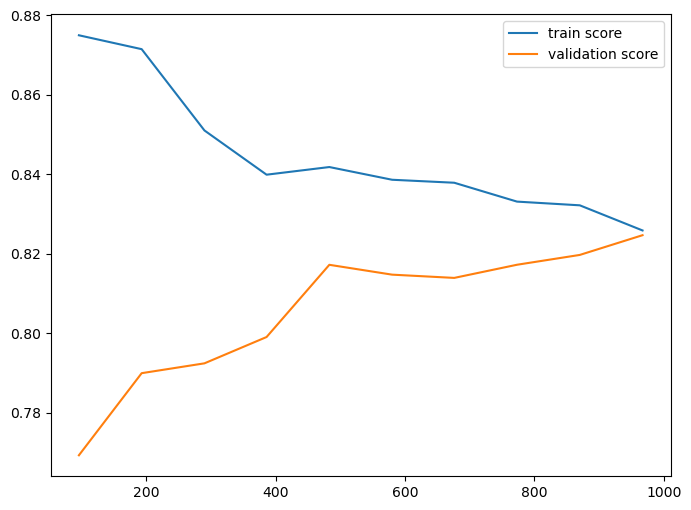

In [41]:
N, train_score, val_score = learning_curve(lr,x_train,y_train, train_sizes=np.linspace(0.1, 1, 10),cv=5)
print(N)
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()


# 4) SVM

In [42]:
svm1 =SVC() # Keeping max_depth = 7 same as DT
svm1.fit(x_train,y_train)
yp_train = svm1.predict(x_train)
yp_test = svm1.predict(x_test)
# Affichage du rapport de classification pour les données d'entraînement
result_train = classification_report(y_train, yp_train)
print("Classification Report for Train Data:")
print(result_train)
# Affichage du rapport de classification pour les données de test
result_test = classification_report(y_test, yp_test)
print("Classification Report for Test Data:")
print(result_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       852
           2       0.95      0.95      0.95       266
           3       1.00      0.88      0.94        41
           4       0.94      0.98      0.96        50

    accuracy                           0.98      1209
   macro avg       0.97      0.95      0.96      1209
weighted avg       0.98      0.98      0.98      1209

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       358
           2       0.94      0.91      0.92       118
           3       1.00      0.83      0.91        24
           4       0.79      1.00      0.88        19

    accuracy                           0.96       519
   macro avg       0.93      0.93      0.92       519
weighted avg       0.97      0.96      0.96       519



In [43]:
f1_SVM= f1_score(y_test, yp_test,average='micro')
MCC_SVM= matthews_corrcoef(y_test, yp_test)
print('F1:',f1_SVM)
print('MCC:',MCC_SVM)

F1: 0.9633911368015414
MCC: 0.9218268115659085


[ 96 193 290 386 483 580 676 773 870 967]


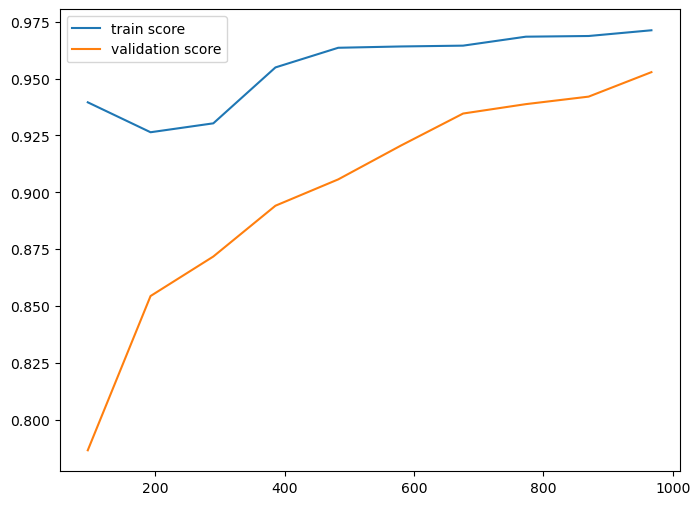

In [44]:
N, train_score, val_score = learning_curve(svm1,x_train,y_train, train_sizes=np.linspace(0.1, 1, 10),cv=5)
print(N)
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

# Comparaison entre les modèles

In [45]:
models = [ 'KNN', 'DT','LR','SVM']
F1_scores = [f1_KNN,f1_DT,f1_LR,f1_SVM,]
print("Models\tAccuracy\n")
for i in range(len(models)):
    print(str(models[i]) + "\t" + str(F1_scores[i]), end='\n')

Models	Accuracy

KNN	0.9171483622350675
DT	0.9171483622350675
LR	0.8169556840077071
SVM	0.9633911368015414



------------>Nous décidons à partir du graphique à barres que le meilleur modèle est SVM<------------


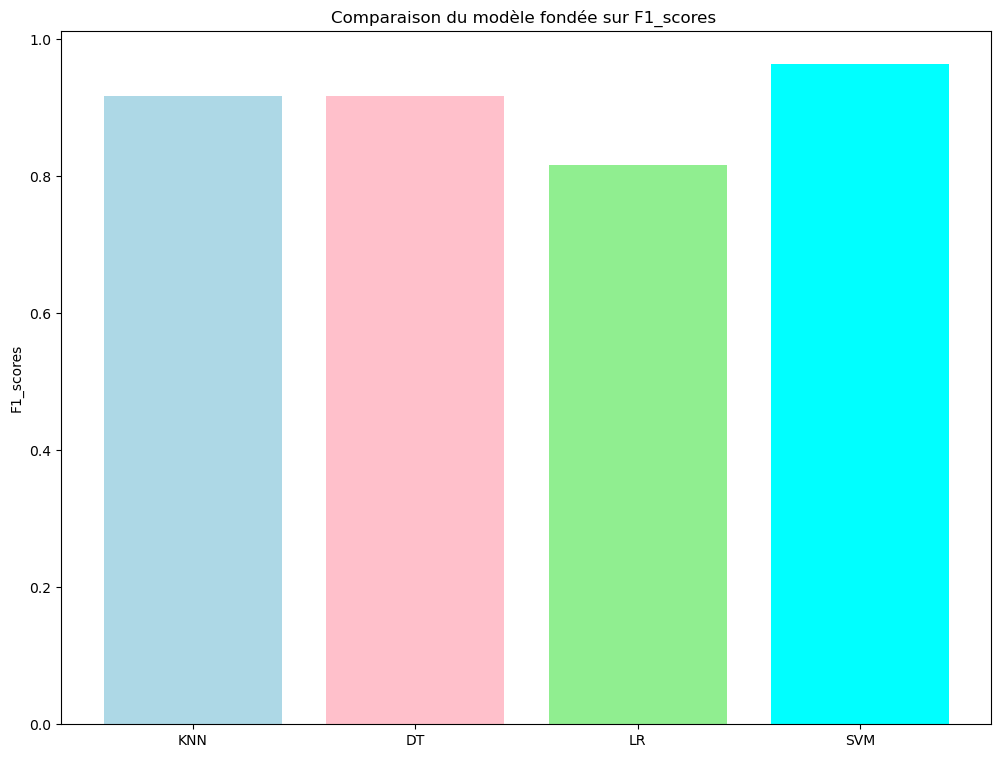

In [46]:
#------------>Trouver le meillleur algorithme utilisant f1-score<----------
print("\n------------>Nous décidons à partir du graphique à barres que le meilleur modèle est SVM<------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, F1_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("F1_scores")
plt.title("Comparaison du modèle fondée sur F1_scores ")
plt.show()

In [47]:
models = ['KNN', 'DT', 'SVM','LR']
MCC_scores = [MCC_LR,MCC_DT,MCC_SVM,MCC_KNN]
print("Models\MCC\n")
for i in range(len(models)):
    print(str(models[i]) + "\t" + str(F1_scores[i]), end='\n')

Models\MCC

KNN	0.9171483622350675
DT	0.9171483622350675
SVM	0.8169556840077071
LR	0.9633911368015414



------------>Nous décidons à partir du graphique à barres que le meilleur modèle est SVM<------------


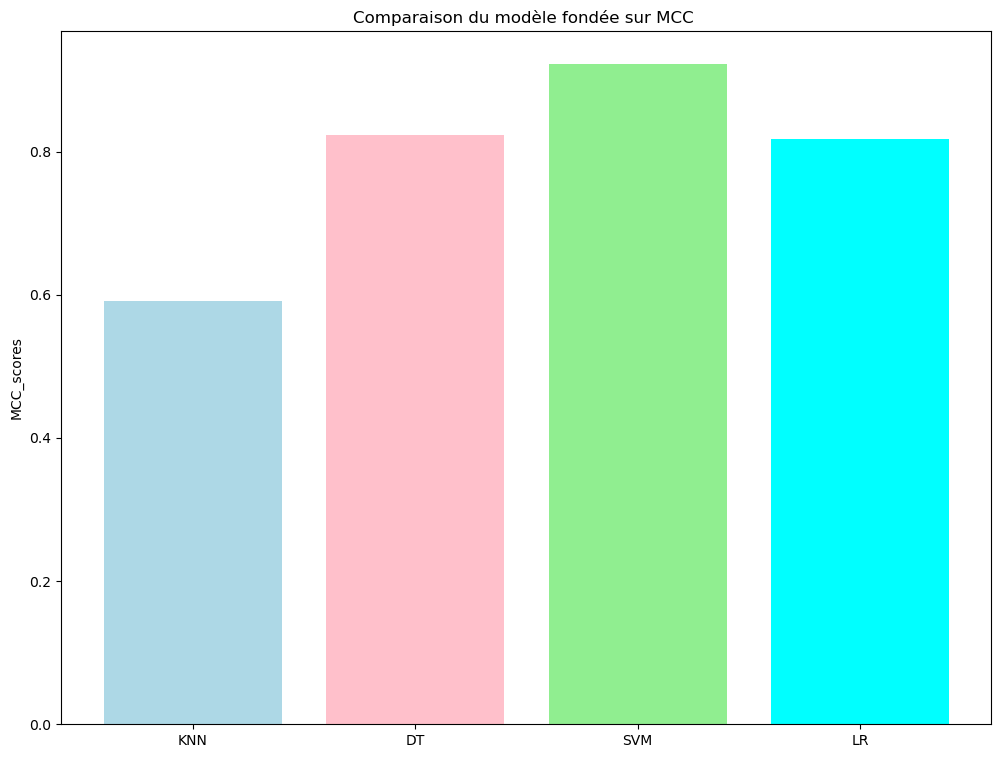

In [48]:
#------------>Trouver le meillleur algorithme utilisant MCC<----------
print("\n------------>Nous décidons à partir du graphique à barres que le meilleur modèle est SVM<------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, MCC_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("MCC_scores")
plt.title("Comparaison du modèle fondée sur MCC ")
plt.show()

# Optimisation des modèles

# SVM

# Validation croisé 

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),x_train, y_train, cv=5, scoring='accuracy').mean()

0.9528445526559446

# Grid search

In [50]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True , verbose  = 3)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.814 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.802 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.814 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.802 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.843 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.814 total time=   1.3s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.839 total time=   1.6s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.839 total time=   1.4s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.846 total time=   1.5s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.884 total time=   1.4s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.814 total time=   1.3s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.839 total time=   1.5s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.839 total time=   1.5s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.846 total time=   1.5s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.884 total time=   1.5s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.814 total time=   1.3s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.839 total time=   1.5s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [51]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [52]:
# afficher best parameter 
print(grid.best_params_)
# imprimer comment notre modèle gère le réglage des hyper-paramètres
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [53]:
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.87      0.94      0.90       358
           2       0.75      0.59      0.66       118
           3       0.82      0.75      0.78        24
           4       0.76      0.68      0.72        19

    accuracy                           0.84       519
   macro avg       0.80      0.74      0.77       519
weighted avg       0.83      0.84      0.83       519



In [54]:
f1_SVM2= f1_score(y_test, yp_test,average='micro')
MCC_SVM2= matthews_corrcoef(y_test, yp_test)
print('F1:',f1_SVM2)
print('MCC:',MCC_SVM2)

F1: 0.9633911368015414
MCC: 0.9218268115659085


[ 96 193 290 386 483 580 676 773 870 967]


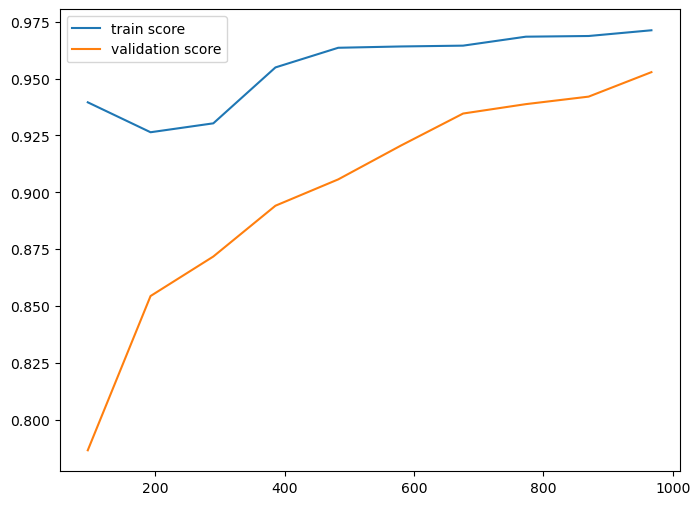

In [55]:
N, train_score, val_score = learning_curve(svm1,x_train,y_train, train_sizes=np.linspace(0.1, 1, 10),cv=5)
print(N)
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

In [56]:
#appliquer la regression logistique sur notre dataset
classifier=SVC()
classifier.fit(x,y)

SVC()

In [57]:
import pickle

In [58]:
#enregestrer le modele
pickle.dump(classifier,open('model.pkl','wb'))